In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import preprocessing
from sklearn import svm, metrics, neural_network, linear_model
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


## VariableDefinition
survival: Survival 0 = No, 1 = Yes 

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 

Sex: 'male', 'female'

sibsp: # of siblings / spouses aboard the Titanic 

parch: # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare 

cabin: Cabin number 

embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data visualization

In [5]:
survive_group = data.groupby(('Survived'))[['Survived']].count()
survive_group.rename(columns={'Survived': 'count'}, inplace=True)

gb_group = data.groupby(('Sex'))[['Sex']].count()
gb_group.rename(columns={'Sex': 'count'}, inplace=True)

class_group = data.groupby(('Pclass'))[['Pclass']].count()
class_group.columns = ['count']

embark_group = data.groupby(('Embarked'))[['Embarked']].count()
embark_group.columns = ['count']

ss_group = data.groupby(('Survived', 'Sex'))[['Sex']].count()
cs_group = data.groupby(('Survived', 'Pclass'))[['Pclass']].count()
es_group = data.groupby(('Survived', 'Embarked'))[['Embarked']].count()

## Categorical distributions

In [6]:
print(survive_group)
print(gb_group)
print(class_group)
print(embark_group)

          count
Survived       
0           549
1           342
        count
Sex          
female    314
male      577
        count
Pclass       
1         216
2         184
3         491
          count
Embarked       
C           168
Q            77
S           644


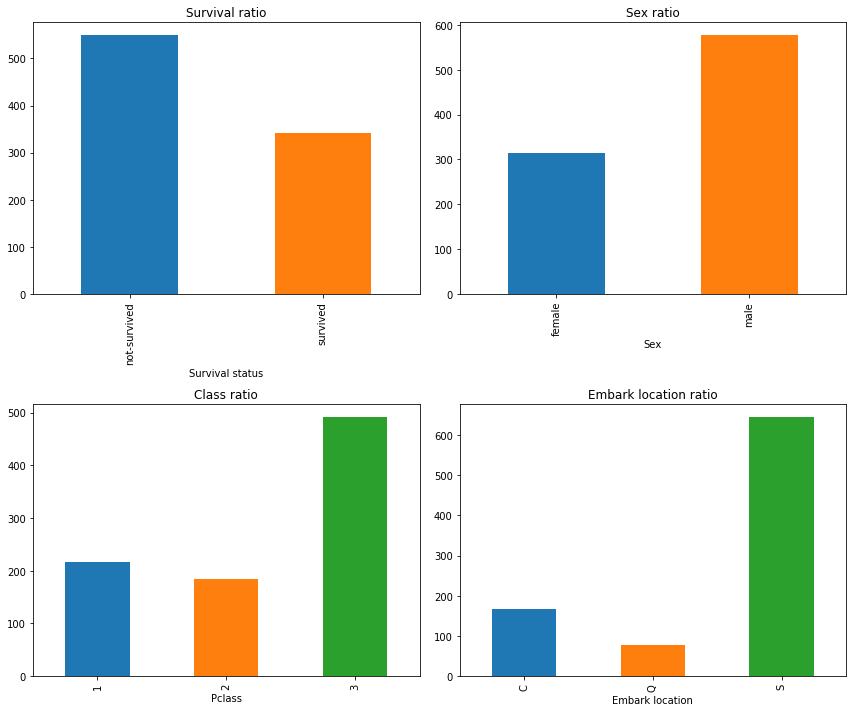

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(12)

surv_ax = survive_group.unstack().plot.bar(ax=axes[0,0], title='Survival ratio')
surv_ax.set_xlabel('Survival status')
surv_ax.set_xticklabels(['not-survived', 'survived'])

sex_ax = gb_group.unstack().plot.bar(ax=axes[0,1], title='Sex ratio')
sex_ax.set_xlabel('Sex')
sex_ax.set_xticklabels(['female', 'male'])

class_ax = class_group.unstack().plot.bar(ax=axes[1,0], title='Class ratio')
class_ax.set_xlabel('Pclass')
class_ax.set_xticklabels(['1','2','3'])

embark_ax = embark_group.unstack().plot.bar(ax=axes[1,1], title='Embark location ratio')
embark_ax.set_xlabel('Embark location')
embark_ax.set_xticklabels(['C','Q','S'])

plt.tight_layout()
plt.show()

## Numerical distributions

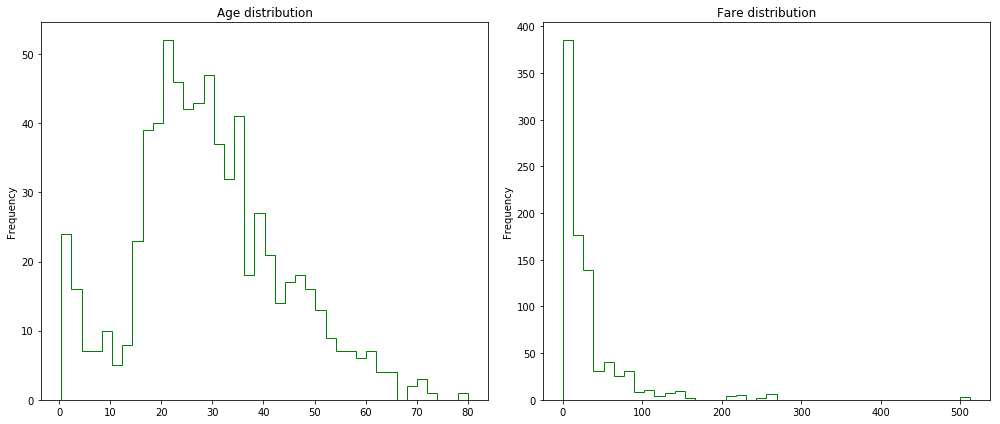

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data['Age'].plot.hist(ax=axes[0], bins=40, histtype='step', color='green', title='Age distribution')
data['Fare'].plot.hist(ax=axes[1], bins=40, histtype='step', color='green', title='Fare distribution')
plt.tight_layout()
plt.show()

## Variable relationships

In [35]:
density_function = lambda x: x/float(x.sum())

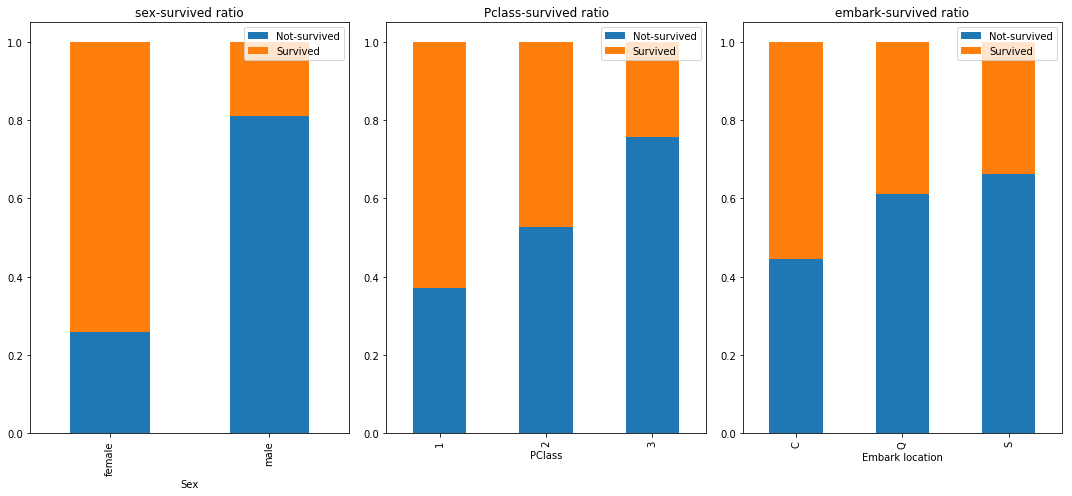

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
fig.set_figheight(7)
fig.set_figwidth(15)

ss_ax = ss_group.groupby(level=1).apply(density_function).unstack('Survived').plot.bar(ax=axes[0], stacked=True,
                                                                                       title='sex-survived ratio')
ss_ax.set_xlabel('Sex')
ss_ax.legend(['Not-survived', 'Survived'])

cs_ax = cs_group.groupby(level=1).apply(density_function).unstack('Survived').plot.bar(ax=axes[1], stacked=True,
                                                                                       title='Pclass-survived ratio')
cs_ax.set_xlabel('PClass')
cs_ax.legend(['Not-survived', 'Survived'])

es_ax = es_group.groupby(level=1).apply(density_function).unstack('Survived').plot.bar(ax=axes[2], stacked=True,
                                                                                       title='embark-survived ratio')
es_ax.set_xlabel('Embark location')
es_ax.legend(['Not-survived', 'Survived'])

plt.tight_layout()
plt.show()

Sex perceivably has a strong correlation with survival rate compared to other variables.

In [9]:
result = stats.chi2_contingency(ss_group.unstack('Survived'))
print('Sex-Survived Chi2\nchi2: {}, p-value: {}'.format(result[0], result[1]))

result = stats.chi2_contingency(cs_group.unstack('Survived'))
print('Pclass-Survived Chi2\nchi2: {}, p-value: {}'.format(result[0], result[1]))

result = stats.chi2_contingency(es_group.unstack('Survived'))
print('Embarked-Survived Chi2\nchi2: {}, p-value: {}'.format(result[0], result[1]))

Sex-Survived Chi2
chi2: 260.71702016732104, p-value: 1.1973570627755645e-58
Pclass-Survived Chi2
chi2: 102.88898875696056, p-value: 4.549251711298793e-23
Embarked-Survived Chi2
chi2: 26.48914983923762, p-value: 1.769922284120912e-06


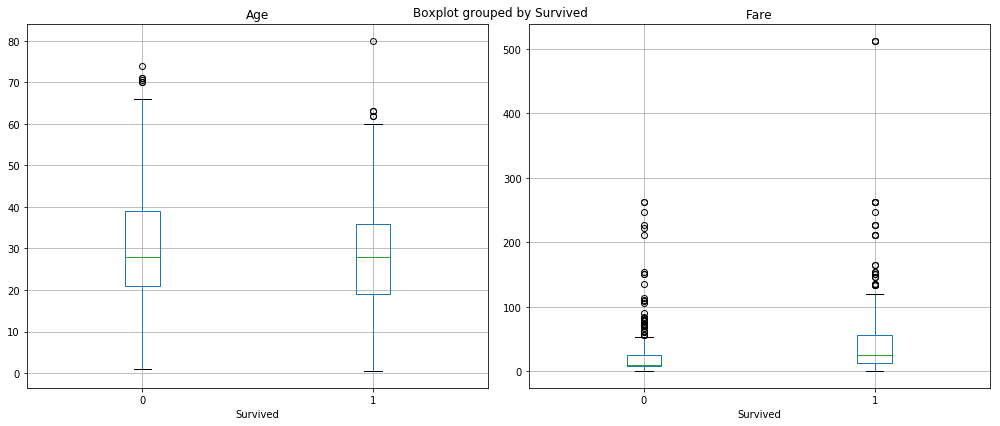

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data.boxplot(ax=axes[0], column='Age', by='Survived')
data.boxplot(ax=axes[1], column='Fare', by='Survived')
plt.tight_layout()
plt.show()

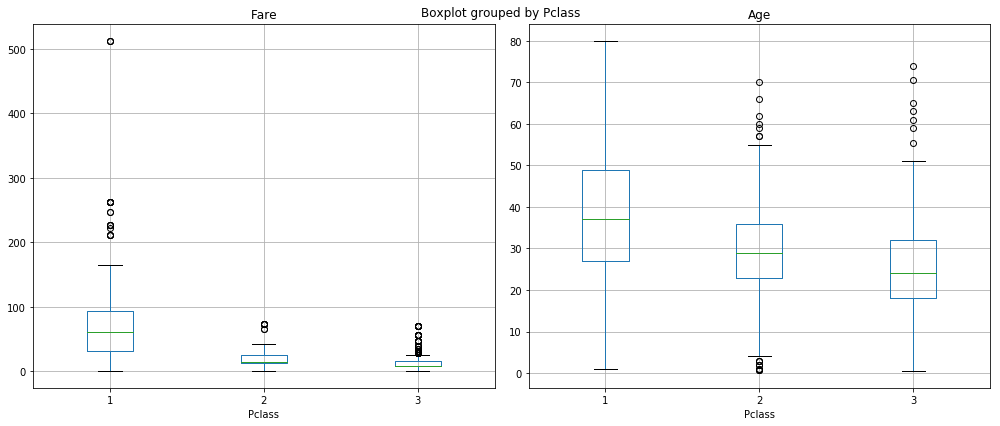

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data.boxplot(ax=axes[0], column='Fare', by='Pclass')
data.boxplot(ax=axes[1], column='Age', by='Pclass')
plt.tight_layout()
plt.show()

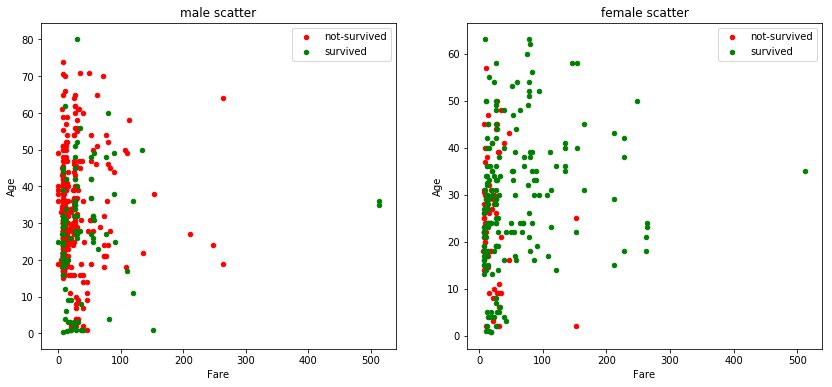

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

data[np.logical_and(data['Sex'] == 'male', 
                    data['Survived'] == 0)].plot.scatter(x='Fare', y='Age', color='red', title='male scatter',
                                                         label='not-survived', ax=axes[0])
data[np.logical_and(data['Sex'] == 'male', 
                    data['Survived'] == 1)].plot.scatter(x='Fare', y='Age', color='green',
                                                         label='survived', ax=axes[0])

data[np.logical_and(data['Sex'] == 'female', 
                    data['Survived'] == 0)].plot.scatter(x='Fare', y='Age', color='red', title='female scatter',
                                                         label='not-survived', ax=axes[1])
data[np.logical_and(data['Sex'] == 'female', 
                    data['Survived'] == 1)].plot.scatter(x='Fare', y='Age', color='green',
                                                         label='survived', ax=axes[1])

plt.show()

In [32]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [47]:
parch_group = data.groupby(['Parch'])[['Parch']].count()
parch_group.columns = ['count']

ps_group = data.groupby(('Survived', 'Parch'))[['Parch']].count()

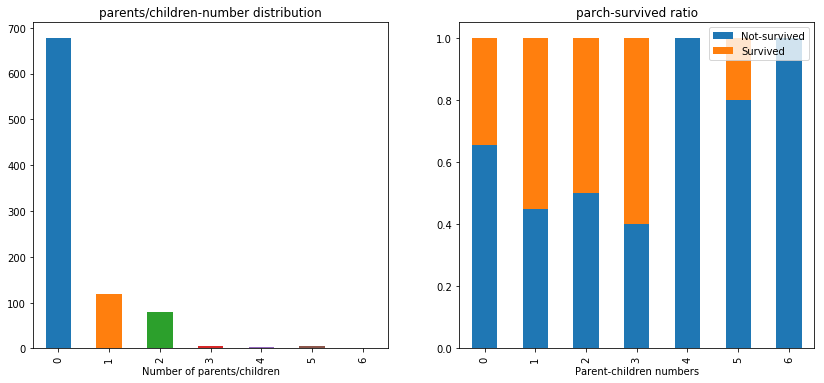

In [50]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(6)
fig.set_figwidth(14)

parch_ax = parch_group.unstack().plot.bar(ax = axes[0], title = 'parents/children-number distribution')
parch_ax.set_xlabel('Number of parents/children')
parch_ax.set_xticklabels(np.arange(7).astype(np.int64))

ps_ax = ps_group.groupby(level=1).apply(density_function).unstack('Survived').plot.bar(ax = axes[1], stacked=True,
                                                                                       title='parch-survived ratio')
ps_ax.set_xlabel('Parent-children numbers')
ps_ax.legend(['Not-survived', 'Survived'])
plt.show()

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


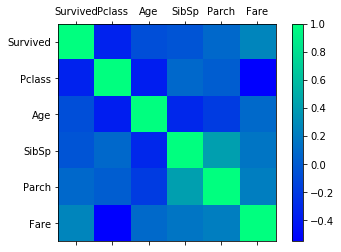

In [92]:
corrs = data.iloc[:,1:].corr()
print(corrs)
corr_labels = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(corrs, cmap='winter')
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_labels)
ax.set_yticklabels(corr_labels)
plt.show()

Age variable shows a certain level of correlation with Pclass, SibSp, and Parch variables. Therefore, we'll use these variables as features to train a regressor model to fill the missing values in the age column.

## Data preparation

In [90]:
data['Cabin'].fillna(value='N', inplace=True)
data['Cabin'] = data['Cabin'].str[0]

In [91]:
print(data['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [93]:
def fill_value_by_ml(row, target_col, feature_cols, model):
    features = row[feature_cols]
    if np.isnan(row[target_col]):
        return float(model.predict([features]))
    else:
        return row[target_col]

In [94]:
neighbor_features = data[np.logical_not(data['Age'].isnull())][['Age', 'Pclass', 'Fare', 'SibSp', 'Parch']]
age_labels = neighbor_features[['Age']]
neighbor_features = neighbor_features.iloc[:,1:]
print(age_labels.head())
print(neighbor_features.head())

    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0
   Pclass     Fare  SibSp  Parch
0       3   7.2500      1      0
1       1  71.2833      1      0
2       3   7.9250      0      0
3       1  53.1000      1      0
4       3   8.0500      0      0


In [95]:
age_regressor = neighbors.KNeighborsRegressor(weights='distance')
age_regressor.fit(neighbor_features, age_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [96]:
train_target = np.array(data['Survived'])

data['Sex'] = data['Sex'].apply(lambda x: 0 if x == 'male' else 1)

embark_map = {'C': 0, 'S': 1, 'Q': 2, 'Nan': 3}
data['Embarked'].fillna('Nan', inplace=True)
data['Embarked'] = data['Embarked'].apply(lambda x: embark_map[x])

data['Age'] = data.apply(fill_value_by_ml, axis=1, target_col='Age',
                         feature_cols=['Pclass', 'Fare', 'SibSp', 'Parch'], model=age_regressor)

In [97]:
fare_means = data.groupby(('Pclass'))['Fare'].mean()
print(fare_means)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [136]:
categ_features = data[['Sex', 'Embarked']]
print(categ_features.head(10))

   Sex  Embarked
0    0         1
1    1         0
2    1         1
3    1         1
4    0         1
5    0         2
6    0         1
7    0         1
8    1         1
9    1         0


In [137]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(categ_features)
ohe_categ_features = ohe.transform(categ_features).toarray()

In [95]:
print(ohe_categ_features)

[[1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 ...
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0.]]


In [138]:
num_features = data[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']]

In [139]:
train_data = np.column_stack((ohe_categ_features, num_features.values))

## Stacked ensemble

In [102]:
bounds = np.array([[-3, 2]])

n_params = bounds.shape[0]
n_restarts = 15

k_fold = 4

sample_vars = np.random.uniform(bounds[:,0], bounds[:,1], size=(n_restarts, n_params))
unit_nums = np.arange(2,8)

In [103]:
acc_scores = np.zeros((3, n_restarts))

# Tuning the first classifier for numeric features
print('Logit model')
for i in range(n_restarts):
    c = 10**sample_vars[i][0]
    cross_scores = list()
    for j in range(k_fold):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=1)
        train_categ = x_train[:,:6]
        val_categ = x_val[:,:6]
        train_num = x_train[:,6:]
        val_num = x_val[:,6:]

        # Classifiers 1: numerical features
        clf1 = linear_model.LogisticRegression(C=c, random_state=1)
        clf1.fit(train_num, y_train)
        
        y_pred = clf1.predict(val_num)
        acc_score = metrics.accuracy_score(y_val, y_pred)
        cross_scores.append(acc_score)
        
    acc_scores[0][i] = np.mean(cross_scores)
    print('[{}] C: {}, accuracy: {}'.format(i+1, c, acc_scores[0][i]))

# Tuning the second classifier for categorical features
print('Neural networks model')
for i in range(unit_nums.shape[0]):
    unit_num = unit_nums[i]
    cross_scores = list()
    for j in range(k_fold):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=1)
        train_categ = x_train[:,:6]
        val_categ = x_val[:,:6]
        train_num = x_train[:,6:]
        val_num = x_val[:,6:]
        
        # Classifier 2: categorical features
        clf2 = neural_network.MLPClassifier(hidden_layer_sizes=(unit_num,2), max_iter=1000, random_state=1)
        clf2.fit(train_categ, y_train)
        
        y_pred = clf2.predict(val_categ)
        acc_score = metrics.accuracy_score(y_val, y_pred)
        cross_scores.append(acc_score)
        
    acc_scores[1][i] = np.mean(cross_scores[1])
    print('[{}] unit_num: {}, accuracy: {}'.format(i+1, unit_num, acc_scores[1][i]))
    
# Extracting the optimal set of hyperparameters
best_c = 10**sample_vars[np.argmax(acc_scores[0])][0]
best_unit_num = unit_nums[np.argmax(acc_scores[1])]
    
# Tuning the stacked classifier
print('Stacked classifier')
for i in range(n_restarts):
    c = 10**sample_vars[i][0]
    cross_scores = list()
    for j in range(k_fold):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=1)
        train_categ = x_train[:,:6]
        val_categ = x_val[:,:6]
        train_num = x_train[:,6:]
        val_num = x_val[:,6:]
        
        clf1 = linear_model.LogisticRegression(C=best_c, random_state=1)
        clf2 = neural_network.MLPClassifier(hidden_layer_sizes=(best_unit_num,2))
        
        clf1.fit(train_num, y_train)
        clf2.fit(train_categ, y_train)
        
        # Stacked classifier trained using probabilities from previous classifiers
        prb1 = clf1.predict_proba(train_num)
        prb2 = clf2.predict_proba(train_categ)
        train_prob = np.column_stack((prb1, prb2))

        stack_clf = linear_model.LogisticRegression(C=c, random_state=1)
        stack_clf.fit(train_prob, y_train)

        # Validation test
        val_prb1 = clf1.predict_proba(val_num)
        val_prb2 = clf2.predict_proba(val_categ)
        val_prob = np.column_stack((val_prb1, val_prb2))
        y_pred = stack_clf.predict(val_prob)

        acc_score = metrics.accuracy_score(y_val, y_pred)
        #confusion_mat = metrics.confusion_matrix(y_val, y_pred)
        
        cross_scores.append(acc_score)
    acc_scores[2][i] = np.mean(cross_scores)
    print('[{}] C: {}, accuracy: {}'.format(i+1, c, acc_scores[2][i]))
    
best_c2 = 10**sample_vars[np.argmax(acc_scores[2])][0]

Logit model
[1] C: 0.40225929431289825, accuracy: 0.659217877094972
[2] C: 0.0033030448155284783, accuracy: 0.659217877094972
[3] C: 0.18085121055499936, accuracy: 0.6703910614525139
[4] C: 1.6943969453469518, accuracy: 0.664804469273743
[5] C: 0.056705573149495335, accuracy: 0.6536312849162011
[6] C: 5.347943143549741, accuracy: 0.659217877094972
[7] C: 0.3259845546301375, accuracy: 0.6703910614525139
[8] C: 0.02430510836694731, accuracy: 0.659217877094972
[9] C: 33.59638729478687, accuracy: 0.659217877094972
[10] C: 0.0013257029527644075, accuracy: 0.6536312849162011
[11] C: 0.011108641417866655, accuracy: 0.6536312849162011
[12] C: 0.6807854155580672, accuracy: 0.6536312849162011
[13] C: 48.23447420436686, accuracy: 0.659217877094972
[14] C: 0.496831320712122, accuracy: 0.659217877094972
[15] C: 0.032143073680184944, accuracy: 0.659217877094972
Neural networks model
[1] unit_num: 2, accuracy: 0.5921787709497207
[2] unit_num: 3, accuracy: 0.5921787709497207
[3] unit_num: 4, accuracy:

/Users/chanuwasaswamenakul/tensorflow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[1] C: 0.40225929431289825, accuracy: 0.7472067039106145
[2] C: 0.0033030448155284783, accuracy: 0.5921787709497207
[3] C: 0.18085121055499936, accuracy: 0.7681564245810055
[4] C: 1.6943969453469518, accuracy: 0.770949720670391
[5] C: 0.056705573149495335, accuracy: 0.7220670391061453
[6] C: 5.347943143549741, accuracy: 0.723463687150838
[7] C: 0.3259845546301375, accuracy: 0.6997206703910615
[8] C: 0.02430510836694731, accuracy: 0.6675977653631284
[9] C: 33.59638729478687, accuracy: 0.7011173184357542
[10] C: 0.0013257029527644075, accuracy: 0.5921787709497207
[11] C: 0.011108641417866655, accuracy: 0.6159217877094972
[12] C: 0.6807854155580672, accuracy: 0.7513966480446927
[13] C: 48.23447420436686, accuracy: 0.776536312849162
[14] C: 0.496831320712122, accuracy: 0.7346368715083799
[15] C: 0.032143073680184944, accuracy: 0.7039106145251396


# Test

In [105]:
test_df = pd.read_csv('test.csv')

In [109]:
print(fare_means)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [ ]:
test_df['Embarked'].fillna('Nan', inplace=True)
test_df['Embarked'] = test_df['Embarked'].apply(lambda x: embark_map[x])

In [117]:
test_df['Sex'] = test_df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

test_df['Fare'] = test_df.apply(lambda x: x.loc['Fare'] if not np.isnan(x.loc['Fare']) else fare_means[x.loc['Pclass']],
                                axis=1)

test_df['Age'] = test_df.apply(fill_value_by_ml, axis=1, target_col='Age',
                               feature_cols=['Pclass', 'Fare', 'SibSp', 'Parch'], model=age_regressor)

In [125]:
print(test_df.info())
print(test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB
None
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lind

In [140]:
categ_features = test_df[['Sex', 'Embarked']]

ohe_categ_features = ohe.transform(categ_features).toarray()

num_features = test_df[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']]

test_data = np.column_stack((ohe_categ_features, num_features.values))

In [141]:
print(train_data.shape)
print(test_data.shape)

(891, 11)
(418, 11)


In [142]:
train_categ = train_data[:,:6]
train_num = train_data[:,6:]

clf1 = linear_model.LogisticRegression(C=best_c, random_state=1)
clf2 = neural_network.MLPClassifier(hidden_layer_sizes=(best_unit_num,2))
        
clf1.fit(train_num, train_target)
clf2.fit(train_categ, train_target)
        
# Stacked classifier trained using probabilities from previous classifiers
prb1 = clf1.predict_proba(train_num)
prb2 = clf2.predict_proba(train_categ)
train_prob = np.column_stack((prb1, prb2))

stack_clf = linear_model.LogisticRegression(C=best_c2, random_state=1)
stack_clf.fit(train_prob, train_target)

LogisticRegression(C=48.23447420436686, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [143]:
test_categ = test_data[:,:6]
test_num = test_data[:,6:]

prb1 = clf1.predict_proba(test_num)
prb2 = clf2.predict_proba(test_categ)
test_prob = np.column_stack((prb1, prb2))

test_pred = stack_clf.predict(test_prob)

In [132]:
print(test_pred.shape)

(891,)


In [145]:
output_df = pd.DataFrame(test_df['PassengerId'])
output_df['Survived'] = test_pred
output_df.to_csv('titanic_submission.csv', index=False)